## Web Scraping
Import Libraries

In [1]:
import pandas as pd
import time
import requests as req
from bs4 import BeautifulSoup as bs


<b>'load_html_page'</b> function loads an html page content for each genre and its page number.


In [10]:
def load_html_page(page_num,genre):
    
    url_base='https://www.vgchartz.com/games/games.php?'
    query_params=f'page={page_num}&results=200&genre={genre}&order=Sales&ownership=Both&direction=DESC&showtotalsales=1'
    query_params+='&shownasales=1&showpalsales=1&showjapansales=1&showothersales=1'
    query_params+='&showpublisher=0&showdeveloper=1&showreleasedate=1&showlastupdate=0'
    query_params+='&showvgchartzscore=1&showcriticscore=1&showuserscore=1&showshipped=1'
    web_site=url_base+query_params
    time.sleep(3) #3-seconds delay
    response=req.get(web_site)
    if response.status_code != 200:
        print(f"Problem connecting to website:{response.status_code}")
        return None
    else:
        print(f"In {genre} Page:{page_num} Connected")
        return response.content
             
    
    
    

In [3]:
#below is a dictionary of genres, each genre key contain number of pages as a value.
genres_dic={'Action':43,'Action-Adventure':10,'Adventure':32,'Fighting':13,
           'Misc':48,'Platform':21,'Puzzle':19,'Racing':18,'Role-Playing':29,
            'Shooter':28,'Simulation':17,'Sports':29,'Strategy':20}

This following code loops through the 'genres_dic' dictionary from above to get the number of pages for each genre, it then loops through the pages<br> and uses the <b>'load_html_page'</b> function. The relevant data is extracted and added to a list of dictionaries called 'games_list'.

In [4]:
games_list=[]
error_occurred=False
for genre, pages_num in genres_dic.items():
    if error_occurred:
        break;
    for page in range(1,pages_num):
        try:
            html_page=load_html_page(page,genre)
            soup=bs(html_page,'html.parser')
            games_table=soup.find('div',{"id":"generalBody"})
            for game in games_table('tr')[3:-1]:
                game_dic={}
                game_row=game('td')
                game_dic['name']=game_row[2].a.string
                game_dic['genre']=genre
                game_dic['console']=game_row[3].img['alt']
                game_dic['developer']=game_row[4].string
                game_dic['vg_score']=game_row[5].string
                game_dic['critic_score']=game_row[6].string
                game_dic['user_score']=game_row[7].string
                game_dic['global_shipped']=game_row[8].string
                game_dic['global_sales']=game_row[9].string
                game_dic['n_america_sales']=game_row[10].string
                game_dic['pal_sales']=game_row[11].string
                game_dic['japan_sales']=game_row[12].string
                game_dic['other_sales']=game_row[13].string
                game_dic['release_year']=game_row[14].string
                games_list.append(game_dic)
                
        except Exception as e:
            print(f"Problem Occurred in {genre} page:{page}: {e}")
            error_occurred=True
            break;
        
        
            
        
            
            
        




In Action Page:1 Connected
In Action Page:2 Connected
In Action Page:3 Connected
In Action Page:4 Connected
In Action Page:5 Connected
In Action Page:6 Connected
In Action Page:7 Connected
In Action Page:8 Connected
In Action Page:9 Connected
In Action Page:10 Connected
In Action Page:11 Connected
In Action Page:12 Connected
In Action Page:13 Connected
In Action Page:14 Connected
In Action Page:15 Connected
In Action Page:16 Connected
In Action Page:17 Connected
In Action Page:18 Connected
In Action Page:19 Connected
In Action Page:20 Connected
In Action Page:21 Connected
In Action Page:22 Connected
In Action Page:23 Connected
In Action Page:24 Connected
In Action Page:25 Connected
In Action Page:26 Connected
In Action Page:27 Connected
In Action Page:28 Connected
In Action Page:29 Connected
In Action Page:30 Connected
In Action Page:31 Connected
In Action Page:32 Connected
In Action Page:33 Connected
In Action Page:34 Connected
In Action Page:35 Connected
In Action Page:36 Connected
I

This code cell checks if the collected data in 'games_list' matches the expected number of records.<br>
If succedeed, it creates a dataframe and saves it to csv.

In [5]:
data_collected=len(games_list)
if data_collected == 61644:
    print(f"Data Collection Succeeded. Total Games Collected:{data_collected}")
    df=pd.DataFrame(games_list)
    df.to_csv('games_raw.csv',index=False)
    
else:
    print(f"Data Collection Failed. Total Games Collected:{data_collected}")
    

Data Collection Succeeded. Total Games Collected:61644


## Data Cleaning
Import Libaries

In [1]:
import pandas as pd
import numpy as np


So lets start by Loading the <b>'games_raw.csv'</b> file into a DataFrame.

In [2]:
df_raw=pd.read_csv('games_raw.csv')
df_raw

,name,genre,console,developer,vg_score,critic_score,user_score,global_shipped,global_sales,n_america_sales,pal_sales,japan_sales,other_sales,release_year
0,God of War,Action,Series,SIE Santa Monica Studio,N/A,N/A,N/A,65.50m,NaN,NaN,NaN,NaN,NaN,22nd Mar 05
1,Warriors,Action,Series,Omega Force,N/A,N/A,N/A,49.95m,NaN,NaN,NaN,NaN,NaN,30th Jun 97
2,Devil May Cry,Action,Series,Capcom,N/A,N/A,N/A,28.00m,NaN,NaN,NaN,NaN,NaN,16th Oct 01
3,God of War (2018),Action,All,SIE Santa Monica Studio,N/A,N/A,N/A,23.00m,NaN,NaN,NaN,NaN,NaN,20th Apr 18
4,Dynasty Warriors,Action,Series,Omega Force,N/A,N/A,N/A,21.28m,NaN,NaN,NaN,NaN,NaN,30th Jun 97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61639,Yu-Gi-Oh! Master Duel,Strategy,PC,Konami,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,N/A
61640,Yu-Gi-Oh! Master Duel,Strategy,XS,Konami,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,N/A
61641,Yu-Gi-Oh! Master Duel,Strategy,XOne,Konami,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,N/A
61642,Yu-Gi-Oh! Master Duel,Strategy,NS,Konami,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,N/A


Replacing any 'N/A' values in the data with 'NaN' values for better handling later.

In [3]:
columns_to_nan=['vg_score','critic_score','user_score','release_year']
for col in columns_to_nan:
    df_raw[col].replace('N/A',np.nan,regex=True,inplace=True)

Dropping rows where all the sales prices in the 'sales' columns values are 'NaN'.<br> 
Then, handeling the scores and sales columns by replacing 'm' like '3.45m' to '3.45'.<br>
Finally converting sales values to a numeric type and filling any remaining missing values in the column
with the median value of that column.

In [4]:
sales_columns=['n_america_sales','pal_sales','japan_sales','other_sales','global_sales']
df_raw.dropna(subset=sales_columns,axis=0,how='all',inplace=True)

In [5]:
for sale in sales_columns:
    df_raw[sale]=pd.to_numeric(df_raw[sale].replace('m','',regex=True))
    df_raw[sale]=df_raw[sale].fillna(df_raw[sale].median())

Removing columns where there are too many missing values.

In [6]:
df_raw.drop(labels='user_score',axis=1,inplace=True)

In [7]:
print(df_raw['global_shipped'].isnull().sum())
df_raw.drop(labels='global_shipped',axis=1,inplace=True)

18545


Filling 'NaN' values in scores columns with zeros and converting values to numeric type.

In [8]:
scores_columns=df_raw.iloc[:,4:6]
for score in scores_columns:
    df_raw[score]=df_raw[score].fillna(0).astype(float)

Dropping rows that are duplicated and keeping the first ones.

In [9]:
df_raw.drop_duplicates(keep='first',inplace=True)

Replacing 'release_year' column values to display only the year like '30th Jun 97' to 1997,
then converting the years from string to numeric.

In [10]:
print(df_raw.release_year.isnull().sum())

80


In [11]:
df_raw['release_year']=pd.to_datetime(df_raw['release_year'],errors='coerce').dt.year.fillna(0).astype(int)
df_raw[['release_year']].head()

,release_year
5,2013
8,2014
11,2002
12,2013
13,2001


Info of our data after cleaning.

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18542 entries, 5 to 59163
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             18542 non-null  object 
 1   genre            18542 non-null  object 
 2   console          18542 non-null  object 
 3   developer        18542 non-null  object 
 4   vg_score         18542 non-null  float64
 5   critic_score     18542 non-null  float64
 6   global_sales     18542 non-null  float64
 7   n_america_sales  18542 non-null  float64
 8   pal_sales        18542 non-null  float64
 9   japan_sales      18542 non-null  float64
 10  other_sales      18542 non-null  float64
 11  release_year     18542 non-null  int32  
dtypes: float64(7), int32(1), object(4)
memory usage: 1.8+ MB


Saving the DataFrame to csv file. 

In [13]:
df_raw.reset_index(drop=True,inplace=True)
df_raw.to_csv('games_clean.csv',index=False)
df_raw

,name,genre,console,developer,vg_score,critic_score,global_sales,n_america_sales,pal_sales,japan_sales,other_sales,release_year
0,Grand Theft Auto V,Action,PS3,Rockstar North,9.5,9.4,20.32,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Action,PS4,Rockstar North,0.0,9.7,19.39,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Action,PS2,Rockstar North,0.0,9.6,16.15,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Action,X360,Rockstar North,0.0,0.0,15.86,9.06,5.33,0.06,1.42,2013
4,Grand Theft Auto III,Action,PS2,DMA Design,0.0,9.5,13.10,6.99,4.51,0.30,1.30,2001
...,...,...,...,...,...,...,...,...,...,...,...,...
18537,M.U.D. TV,Strategy,PC,Realmforge Studios,0.0,0.0,0.00,0.12,0.00,0.04,0.00,2010
18538,Hired Guns: The Jagged Edge,Strategy,PC,GFI Russia,0.0,0.0,0.00,0.12,0.00,0.04,0.00,2007
18539,UFO: Aftermath,Strategy,PC,Altar Interactive,0.0,0.0,0.00,0.12,0.00,0.04,0.01,2003
18540,Ride! Carnival Tycoon,Strategy,PC,ValuSoft,0.0,0.0,0.00,0.12,0.00,0.04,0.01,2007


## Visualization
Import Libraries

In [1]:
import pandas as pd
import numpy as np
#-----matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
#-----seaborn
import seaborn as sns

Loading the clean dataset.

In [2]:
df=pd.read_csv('games_clean.csv')
df

,name,genre,console,developer,vg_score,critic_score,global_sales,n_america_sales,pal_sales,japan_sales,other_sales,release_year
0,Grand Theft Auto V,Action,PS3,Rockstar North,9.5,9.4,20.32,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Action,PS4,Rockstar North,0.0,9.7,19.39,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Action,PS2,Rockstar North,0.0,9.6,16.15,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Action,X360,Rockstar North,0.0,0.0,15.86,9.06,5.33,0.06,1.42,2013
4,Grand Theft Auto III,Action,PS2,DMA Design,0.0,9.5,13.10,6.99,4.51,0.30,1.30,2001
...,...,...,...,...,...,...,...,...,...,...,...,...
18537,M.U.D. TV,Strategy,PC,Realmforge Studios,0.0,0.0,0.00,0.12,0.00,0.04,0.00,2010
18538,Hired Guns: The Jagged Edge,Strategy,PC,GFI Russia,0.0,0.0,0.00,0.12,0.00,0.04,0.00,2007
18539,UFO: Aftermath,Strategy,PC,Altar Interactive,0.0,0.0,0.00,0.12,0.00,0.04,0.01,2003
18540,Ride! Carnival Tycoon,Strategy,PC,ValuSoft,0.0,0.0,0.00,0.12,0.00,0.04,0.01,2007


Lets start by looking how many games released over the years 1977-2022 and what are the critical years.

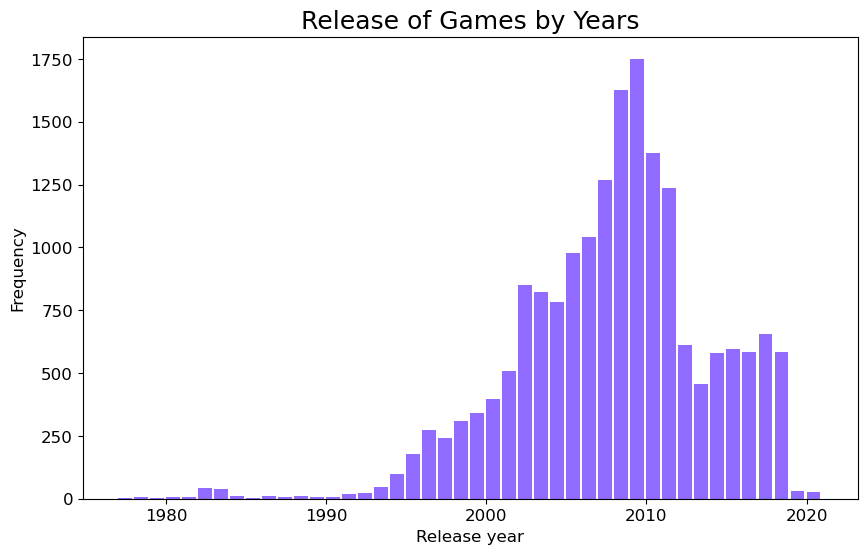

In [3]:
year_range=[1977,2022]
df['release_year'].plot(kind='hist',bins=range(year_range[0], year_range[1]),color='#916BFF',width=0.85,fontsize=12,figsize=(10,6))

plt.xlabel('Release year',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Release of Games by Years',fontsize=18)
plt.show()

We can notice that there was a relatively lower numebr of game releases from 1980 to 1990. However a significant increase in the number of releases occurred between 1990 and 2010 and that growth can be due to the development of technology but from 2010 to 2020 there was a gradual decline in the number of releases
surprisingly low as seen in the early years. Now let's look at the different regions sales of those years.

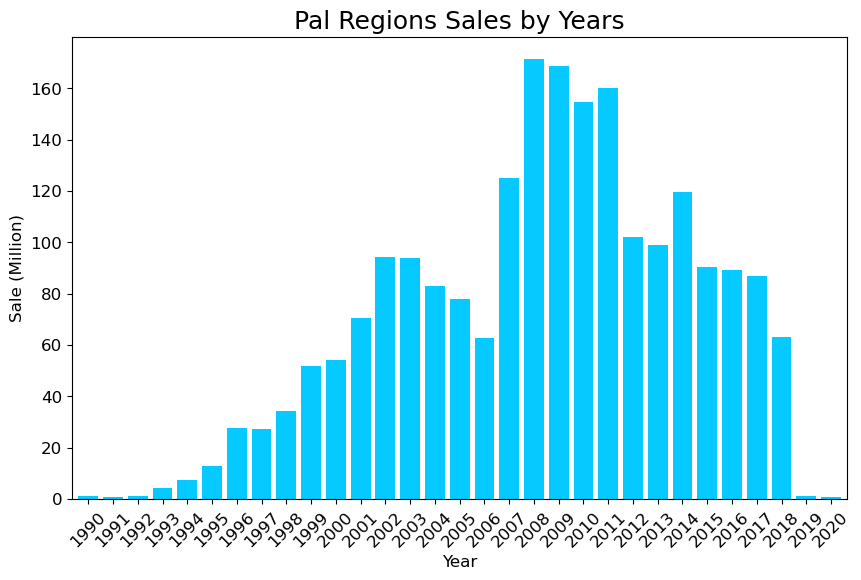

In [4]:
year_range = [1990, 2022]
sales_by_year = df[(df['release_year'] >= year_range[0]) & (df['release_year'] <= year_range[1])]
sales_by_year=sales_by_year.groupby('release_year')['pal_sales'].sum()
sales_by_year.plot(kind='bar',color='#06CAFF',linewidth=2,width=0.8, fontsize=12, figsize=(10, 6))

plt.xlabel('Year',fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Sale (Million)',fontsize=12)
plt.title('Pal Regions Sales by Years', fontsize=18)
plt.show()

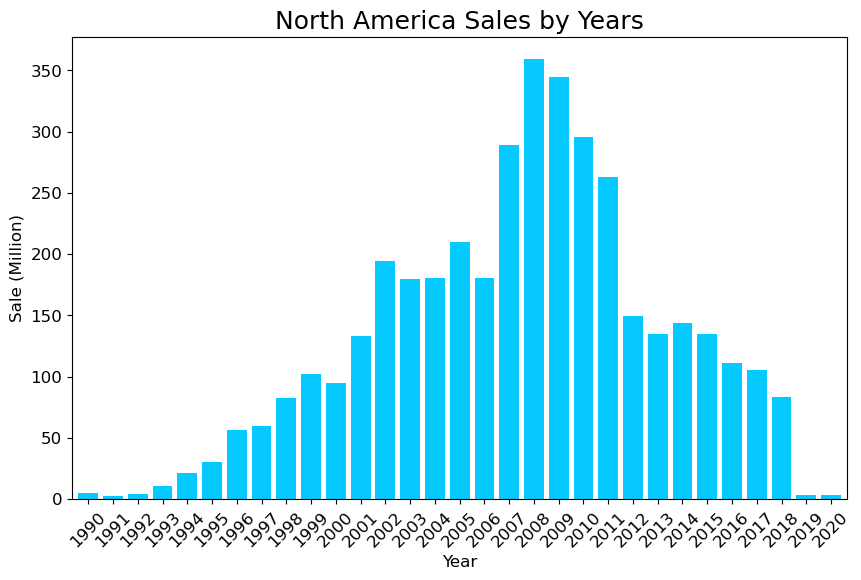

In [5]:
year_range = [1990, 2022]
sales_by_year = df[(df['release_year'] >= year_range[0]) & (df['release_year'] <= year_range[1])]
sales_by_year=sales_by_year.groupby('release_year')['n_america_sales'].sum()
sales_by_year.plot(kind='bar',color='#06CAFF',linewidth=2,width=0.8, fontsize=12, figsize=(10, 6))

plt.xlabel('Year',fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Sale (Million)',fontsize=12)
plt.title('North America Sales by Years', fontsize=18)
plt.show()

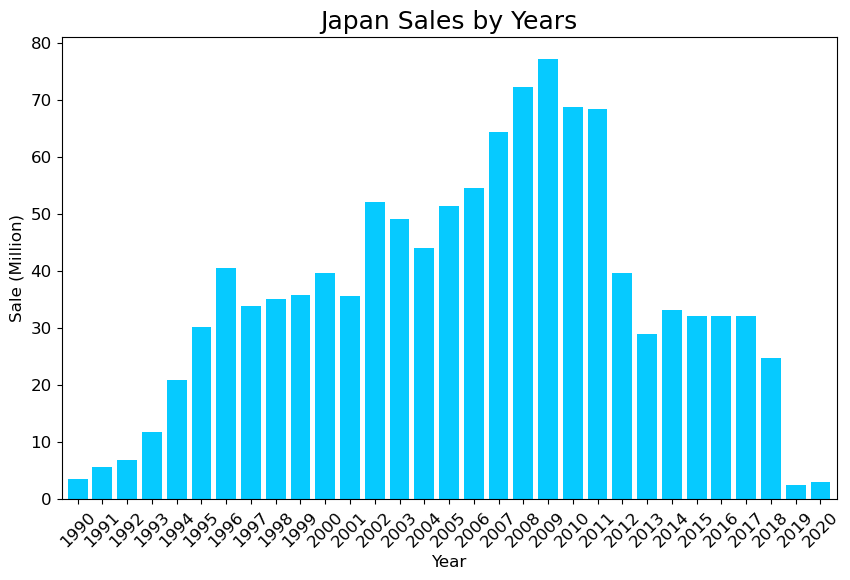

In [6]:
year_range = [1990, 2022]
sales_by_year = df[(df['release_year'] >= year_range[0]) & (df['release_year'] <= year_range[1])]
sales_by_year=sales_by_year.groupby('release_year')['japan_sales'].sum()
sales_by_year.plot(kind='bar',color='#06CAFF',linewidth=2,width=0.8, fontsize=12, figsize=(10, 6))

plt.xlabel('Year',fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Sale (Million)',fontsize=12)
plt.title('Japan Sales by Years', fontsize=18)
plt.show()

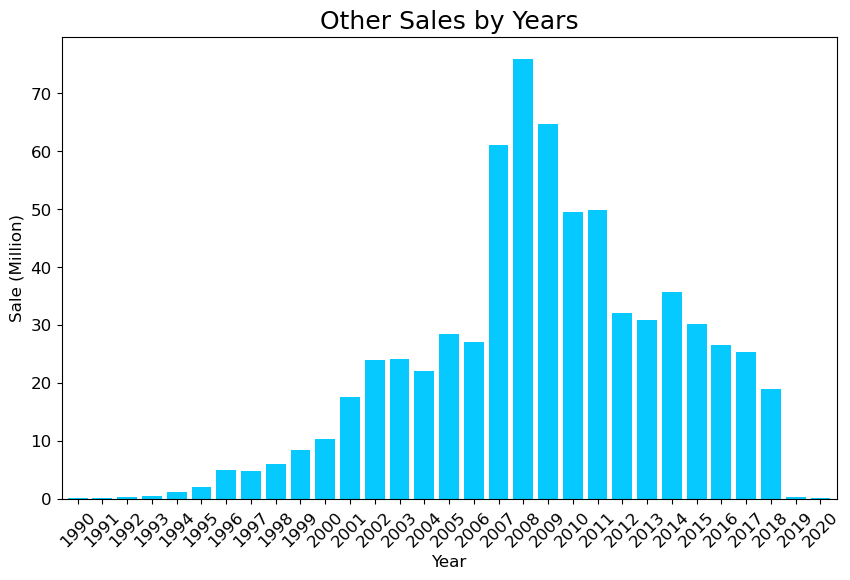

In [7]:
year_range = [1990, 2022]
sales_by_year = df[(df['release_year'] >= year_range[0]) & (df['release_year'] <= year_range[1])]
sales_by_year=sales_by_year.groupby('release_year')['other_sales'].sum()
sales_by_year.plot(kind='bar',color='#06CAFF',linewidth=2,width=0.8, fontsize=12, figsize=(10, 6))

plt.xlabel('Year',fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Sale (Million)',fontsize=12)
plt.title('Other Sales by Years', fontsize=18)
plt.show()

2008 and 2009 were the years that gaming industry achieved the highest level of sales. It can be noticed that there is a connection between the volume of game releases and sales because both 2008 and 2009 were the years in which the most games were released  but the success and popularity of games cannot be solely determined by the number in given years like other factors such as type of genre can play signifcant role.

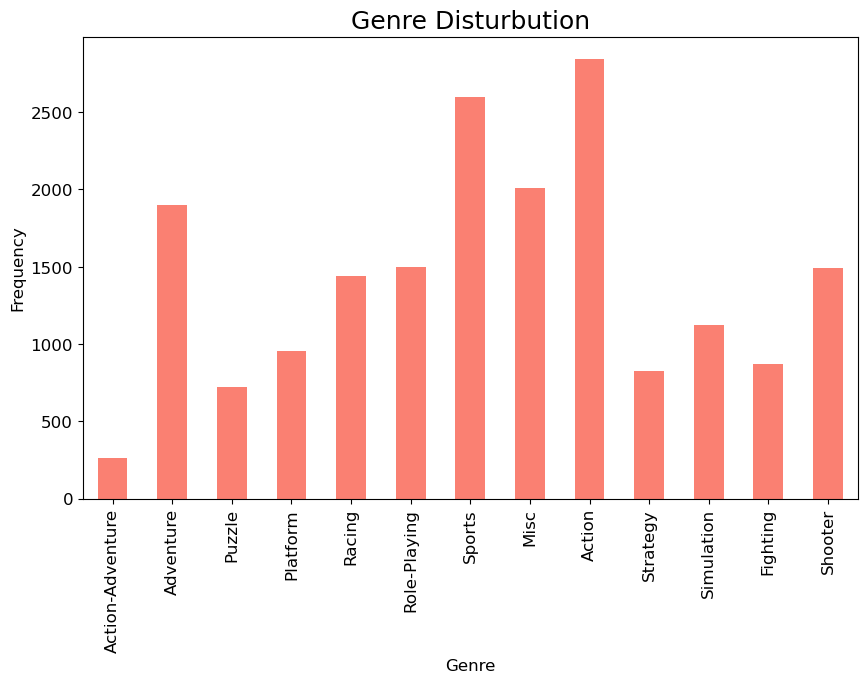

In [8]:
df['genre'].value_counts().sample(frac=1).plot(kind='bar', color='salmon', figsize=(10, 6), fontsize=12)

plt.xlabel('Genre',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Genre Disturbution',fontsize=18)
plt.show()

It's not surprising to find that action is the most common genre in the gaming industry and in second place sports. Seriuosly, who doesn't enjoy action and sports? but are the most common genres also the best-selling ones?


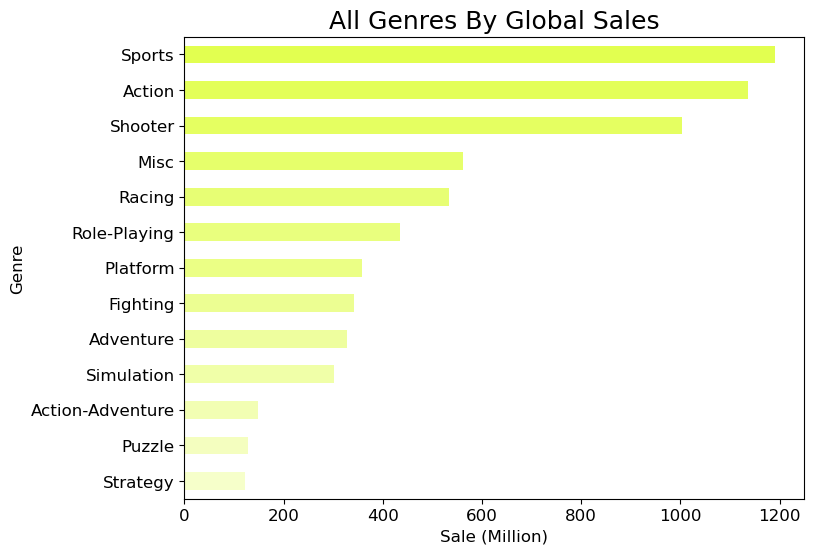

In [9]:
my_colors_yellow=['#F6FFCA','#F4FEBF','#F2FEB3','#F0FFA8','#EEFE9E',
                  '#ECFE92','#EBFF85','#E9FF7E','#E7FE74','#E6FF6B',
                  '#E5FF61','#E3FF59','#E2FF50','#E0FF45','#DEFF3B',
                  '#DDFF31','#DCFF2E','#DAFF22','#D8FF18','#D4FF00']

df.groupby('genre')['global_sales'].sum().nlargest(13)[::-1].plot(kind='barh',color=my_colors_yellow,fontsize=12,figsize=(8,6))

plt.xlabel('Sale (Million)',fontsize=12)
plt.ylabel('Genre',fontsize=12)
plt.title('All Genres By Global Sales',fontsize=18)
plt.show()

Despite action being the most common genre in the gaming industry, sports takes the lead in terms of global sales, followed by action and third place goes to the shooting genre which was less common in terms of popularity.


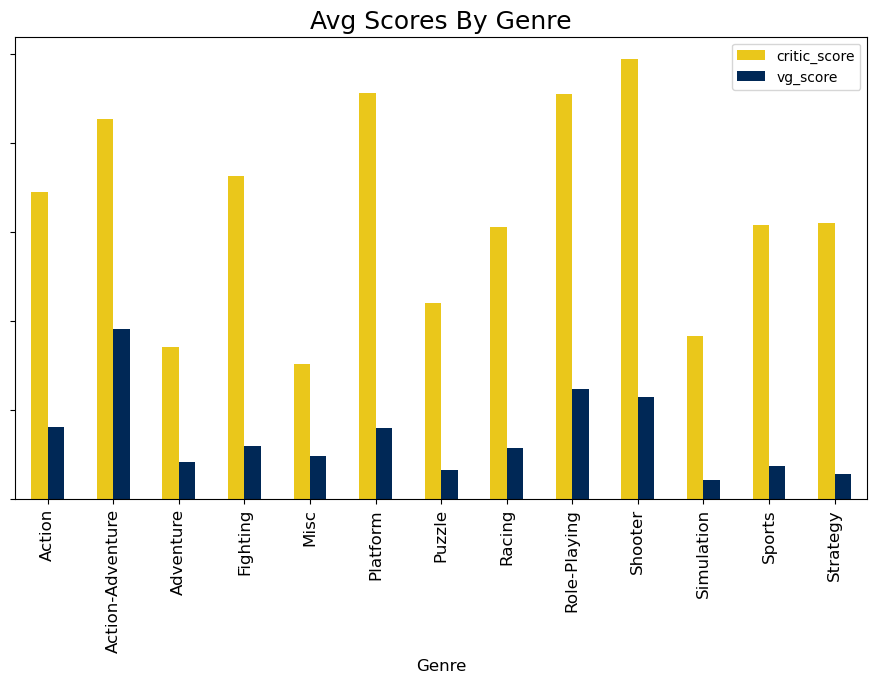

In [10]:
df.groupby('genre')[['critic_score','vg_score']].mean().plot(kind='bar',color=['#EAC71B','#002856'],fontsize=12,figsize=(11,6)).set_yticklabels([])

plt.xlabel('Genre',fontsize=12)
plt.title('Avg Scores By Genre',fontsize=18)
plt.show()

In terms of average scores, you can see a moderate connection between scores and sales such as the shooting genre. Yet, the sports and action genres occupy medium positions and the miscellaneous genre was at the top of global sales is now among the lowest which shows that high scores do not necessarily guarantee high sales.

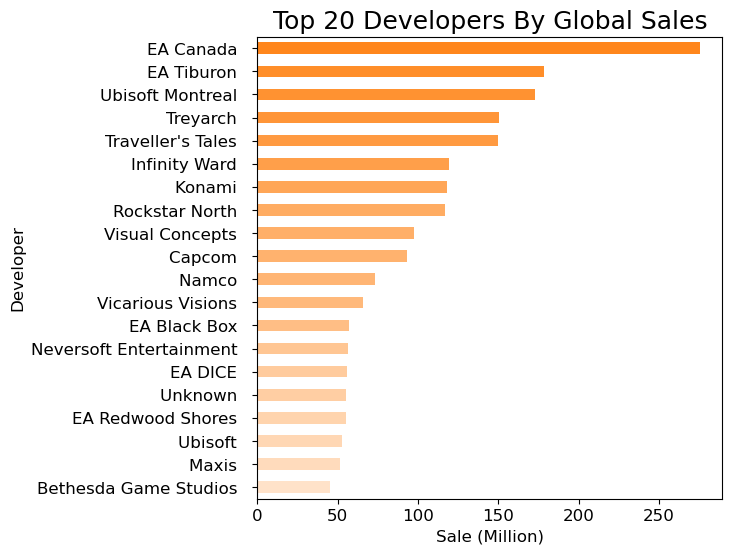

In [11]:
my_colors_orange=['#FFE2C9','#FFDBBC','#FFD7B4','#FFD4AD','#FFCEA3',
                  '#FFCB9D','#FFC693','#FFBE85','#FFB97B','#FFB574',
                  '#FFB26E','#FFAF68','#FFAC62','#FFA657','#FF9F4A',
                  '#FF9A41','#FF9538','#FF9231','#FF8E29','#FF861C']

top_developer_sales=df.groupby('developer')['global_sales'].sum().nlargest(20)[::-1]
top_developer_sales.plot(kind='barh',color=my_colors_orange,fontsize=12,figsize=(6,6))

plt.xlabel('Sale (Million)', fontsize=12)
plt.ylabel('Developer', fontsize=12)
plt.title('Top 20 Developers By Global Sales', fontsize=18)
plt.show()

Electronic Arts (EA) is an international company known for its extensive collection of games. With one of its development centers located in Candada, they have created some of the most popular games, including FIFA, a well known sport genre game that sheds light on why sport game have the highest global sales. 


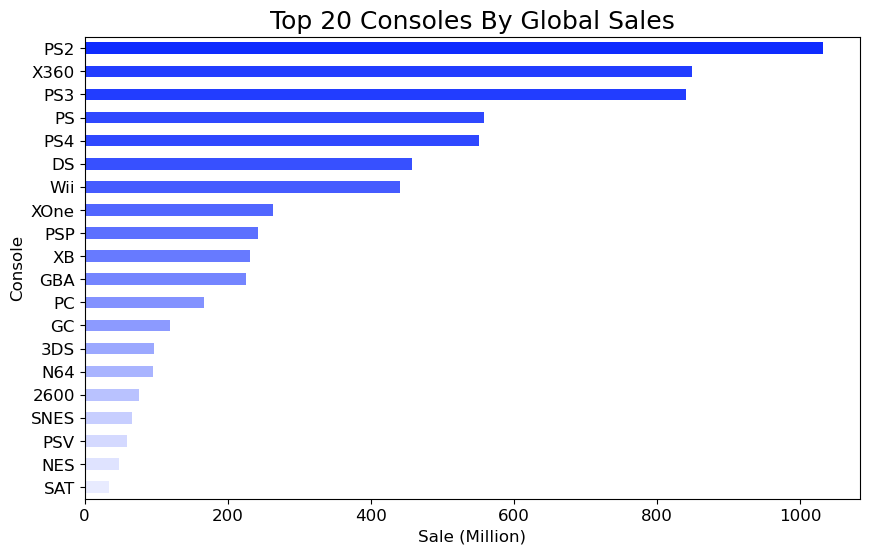

In [12]:
my_colors_blue = ['#E8EBFF','#DFE3FF','#D4D9FF','#C7CEFF','#B9C2FF','#A9B4FF','#9BA8FF','#8C9AFF',
            '#8392FF','#7485FF','#677AFF','#5C70FF','#5166FF','#455BFF','#3750FF','#2F48FF',
             '#2F48FF','#223DFF','#223DFF','#0E2BFF']

df.groupby('console')['global_sales'].sum().nlargest(20)[::-1].plot(kind='barh',color=my_colors_blue,fontsize=12,figsize=(10,6))

plt.xlabel('Sale (Million)',fontsize=12)
plt.ylabel('Console',fontsize=12)
plt.title('Top 20 Consoles By Global Sales',fontsize=18)
plt.show()

It is surprising that Sony Playstation 2, which relatively an old platform sold the most by global sales.

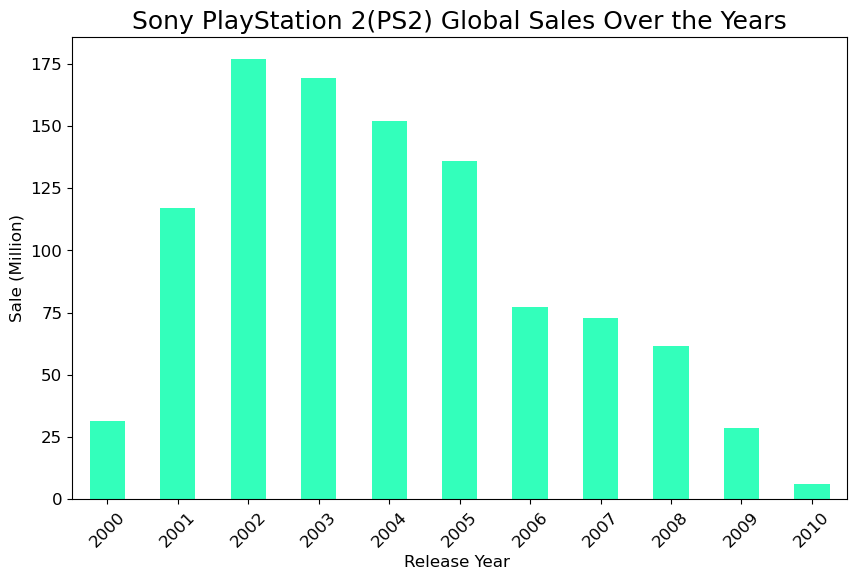

In [13]:
ps2_games = df[(df['console'] == 'PS2') & (df['release_year'] >= 2000) & (df['release_year'] <= 2010)]
ps2_games.groupby('release_year')['global_sales'].sum().plot(kind='bar', color='#33FFBB',fontsize=12,figsize=(10, 6))

plt.xlabel('Release Year ', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Sale (Million)', fontsize=12)
plt.title('Sony PlayStation 2(PS2) Global Sales Over the Years', fontsize=18)
plt.show()

In 2002, Sony PlayStation 2 sold the most in terms of global sales, close to 175 million which is quite impressive.<br>
Intersting what are the most common genres playing by PS2 console.

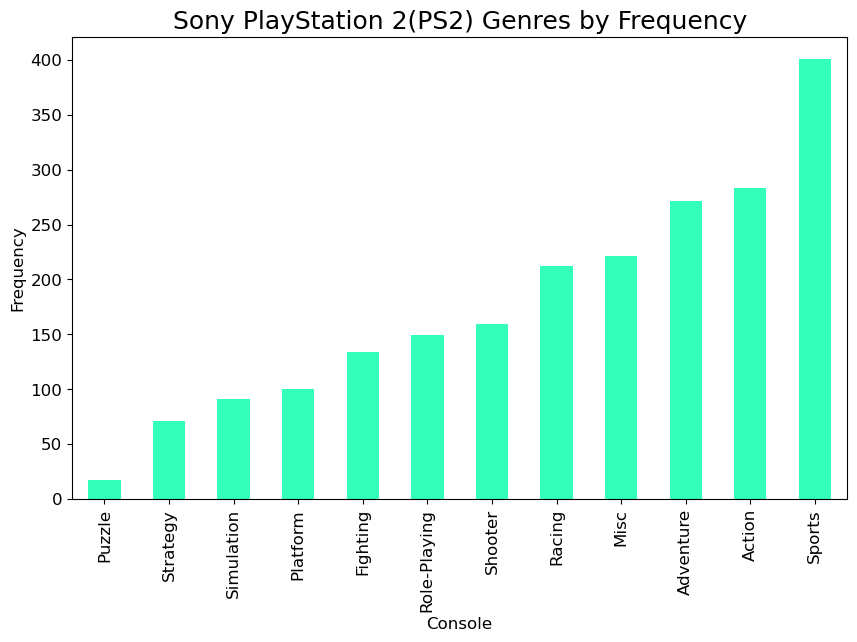

In [14]:
ps2_games['genre'].value_counts().sort_values().plot(kind='bar',color='#33FFBB',fontsize=12,figsize=(10,6))

plt.xlabel('Console',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Sony PlayStation 2(PS2) Genres by Frequency',fontsize=18)
plt.show()

It's noticeable how popular the sports genre is on the Sony PlayStation 2 (PS2), surpassing the other genres by a significant margin. Additionally, it is the best-selling genre in terms of global sales as seen before.
Next, which region has the highest sales?

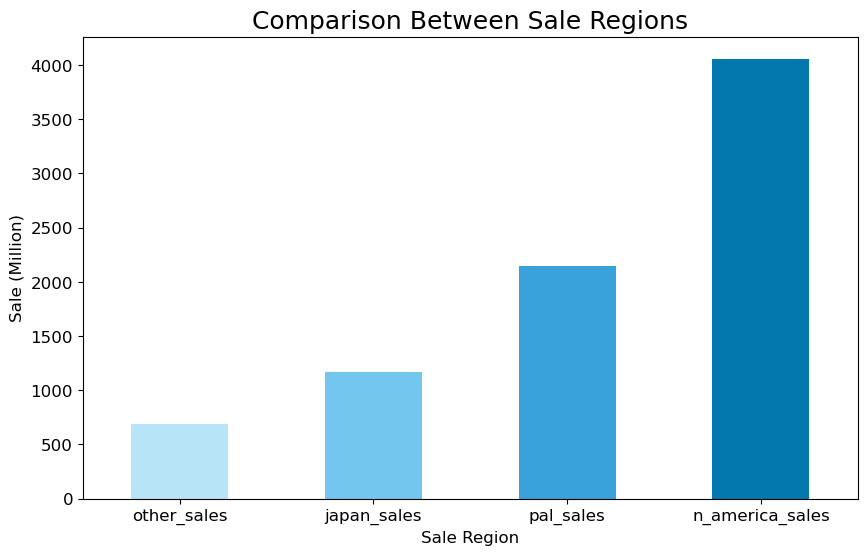

In [15]:
my_colors_ocean=['#B7E4F7','#73C7EF','#39A2DB','#0278AE']
sales=df[['n_america_sales','pal_sales','other_sales','japan_sales']].sum()
sales.sort_values().plot(kind='bar', color=my_colors_ocean,fontsize=12,figsize=(10,6))


plt.xlabel('Sale Region', fontsize=12)
plt.ylabel('Sale (Million)', fontsize=12)
plt.title('Comparison Between Sale Regions', fontsize=18)
plt.xticks(rotation=0)
plt.show()

North America is the winner in terms of sales and that is also makes sense because it is the third largest continent in the world.<br>Lets look at its sales by genre and console alongside other regions.

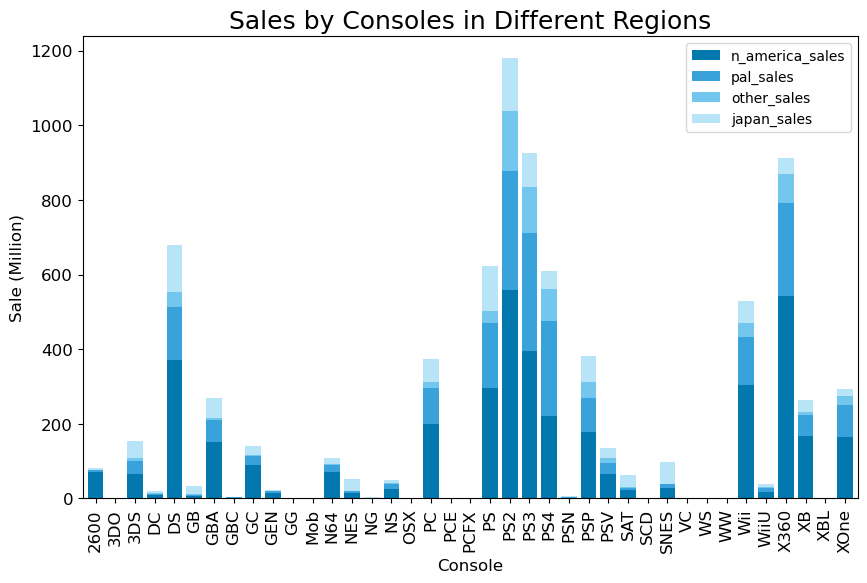

In [16]:
my_colors_regions=['#0278AE', '#39A2DB', '#73C7EF', '#B7E4F7']
console_sales = df.groupby('console')[['n_america_sales', 'pal_sales', 'other_sales', 'japan_sales']].sum()
console_sales.plot(kind='bar',color=my_colors_regions, stacked=True, fontsize=12,width=0.8, figsize=(10, 6))

plt.xlabel('Console', fontsize=12)
plt.ylabel('Sale (Million)', fontsize=12)
plt.title('Sales by Consoles in Different Regions', fontsize=18)
plt.show()

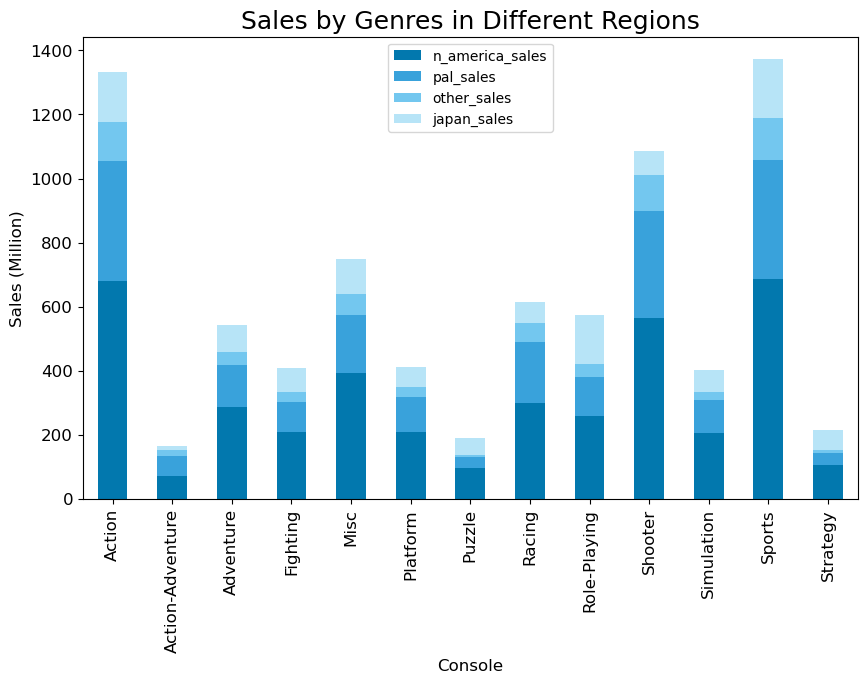

In [17]:
console_sales = df.groupby('genre')[['n_america_sales', 'pal_sales', 'other_sales', 'japan_sales']].sum()
console_sales.plot(kind='bar',stacked=True,color=my_colors_regions,fontsize=12, figsize=(10, 6))

plt.xlabel('Console', fontsize=12)
plt.ylabel('Sales (Million)', fontsize=12)
plt.title('Sales by Genres in Different Regions', fontsize=18)
plt.show()

Exploring the relation between reviews and sales in different regions.

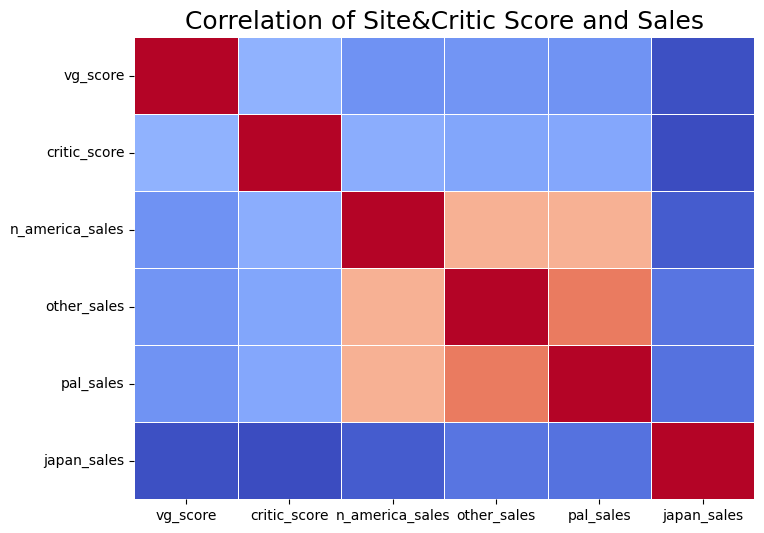

In [19]:
corr_mat = df[['vg_score','critic_score','n_america_sales','other_sales','pal_sales','japan_sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat,linewidth=0.5,cmap='coolwarm',cbar=False)
plt.title('Correlation of Site&Critic Score and Sales', fontsize=18)
plt.show()

We can notice a positive correlation between different sales regions and reviews, indicating that for example when sales in north america increase, sales in the european and asian regions tend to increase similarly. Japan exhibits a relatively low positive correlation with the other regions showing that japan tend to increase in non-linear connection with other sales. Those insights can provide us with valuable information for future proccess.

## Machine Learning

Import Libraries

In [1]:
import pandas as pd
import numpy as np
#sns
import seaborn as sns
#matplotlib
import matplotlib.pyplot as plt
#----------Machine Learning
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing, linear_model, model_selection, metrics
#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#split to train and test
from sklearn.model_selection import train_test_split
#DesicionTree & RandomForest
from sklearn import tree, ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Linear Regression
from sklearn.linear_model import LinearRegression
#metrics for evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Loading the dataset.

In [2]:
df=pd.read_csv('games_clean.csv')
df.columns

Index(['name', 'genre', 'console', 'developer', 'vg_score', 'critic_score',
       'global_sales', 'n_america_sales', 'pal_sales', 'japan_sales',
       'other_sales', 'release_year'],
      dtype='object')

We want to consider the historical time frame which means utilizing the history of games that have been released. Therefore we will divide the games that were released until the year 2012 into approximately 80% for training and around 20% for testing on the years 2013 and onward.

In [3]:
unique_years = df['release_year'].unique()
unique_years = sorted(unique_years, reverse=True)
split_index = int(len(unique_years) * 0.2)
split_year = unique_years[split_index]
print(split_year)             

2012


Dropping columns that are not relevant for our models:
<ul>
<li>name</li>
<li>global_sales</li>
</ul>
The column of names does not provide us with much information about sales, and global sales are not necessary because we are using the sales data from all different regions.

In [4]:
df.drop(['name','global_sales'],axis=1,inplace=True)

Preparing the data for machine learning tasks involves converting the categorical columns in our dataset to numerical and creating a binary indicator variable for the genre column.

In [5]:
df['developer']=LabelEncoder().fit_transform(df['developer'])
df['console']=LabelEncoder().fit_transform(df['console'])
df['genre']=np.where(df['genre'] == 'Sports',1,0)

The <b>'create_success_column'</b> function is responsible for generating a new column called "success" for prediction in our model that incorporates three levels of success by sales for each region:
<ul>
    <li>Low(0): represents values below 30%</li>
    <li>moderate(1): between 30% and 70%</li>
    <li>high(2): represents values above 70%</li>
</ul>
In Japan, we had difficulty defining according to these three levels of success because most of the sales prices in japan are in the middle range of success so we expanded it slightly.

In [6]:
def create_success_column(df,target_col):
    
    df_copy=df.copy()
    if target_col == 'japan_sales':
        Q1=df_copy[target_col].quantile(0.25)
        Q2=df_copy[target_col].quantile(0.85)
    else:
        Q1=df_copy[target_col].quantile(0.3)
        Q2=df_copy[target_col].quantile(0.7)
        
    bins = [float('-inf'),Q1,Q2,float('inf')]
    labels = [0, 1, 2]
    df_copy['success']=pd.cut(df_copy[target_col], bins=bins, labels=labels, right=False)    
    df_copy=df_copy.drop([target_col],axis=1)    
    
    return df_copy

Splitting the data into train and test sets, specifically for a specified year.

In [7]:
def split_to_train_and_test(df,target_col):
    
    X=df[df.columns[df.columns != target_col]]
    y=df[target_col]
    X_train = X[X['release_year'] <= split_year]
    X_test = X[X['release_year'] > split_year]
    y_train = y[X['release_year'] <= split_year]
    y_test = y[X['release_year'] > split_year]
    
    return X_train, X_test, y_train, y_test
    

Preprocessing step: scaling the data in order to improve the performance of our machine learning models. 

In [8]:
def scale_features(X_train,X_test):
    
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

The function below enables training of our chosen types of machine learning algorithms based on the specified type:<br>
<ul>
    <li>Decision Tree</li>
    <li>Random Forest</li>
    <li>Linear Regression</li>
</ul>

In [9]:
def train_model(X_train,y_train,classifer):
    
    if classifer == 'DecisionTree':
        dt=DecisionTreeClassifier()
        trained_model=dt.fit(X_train,y_train)
    elif classifer == 'RandomForest':
        rf=RandomForestClassifier(n_estimators=50)
        trained_model=rf.fit(X_train,y_train)
    elif classifer == 'LinearRegression':
        lr=LinearRegression()
        trained_model=lr.fit(X_train,y_train)
    
    return trained_model

After the training process of our machine learning models, we can make use of the following function to perform predictions.

In [10]:
def predict(trained_m,X_test):
    
    predicted_vals=trained_m.predict(X_test)
    return predicted_vals

The step after making predictions is to evaluate the performance of our models using the function below.

In [11]:
def evaluate_model(y_test,y_pred):
    
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("F1 Score:", metrics.f1_score(y_test, y_pred, average='macro'))
    print("Recall Score:", metrics.recall_score(y_test, y_pred, average='macro'))
    print("Precision Score:", metrics.precision_score(y_test, y_pred, average='macro'))
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    labels = ['Low','Moderate','High']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False,xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted',fontsize=12)
    plt.ylabel('True',fontsize=12)
    plt.title('Confusion Matrix',fontsize=18)
    plt.show()

Let's begin by using linear regression to attempt to predict game sales in each region.

<b>Pal Sales Model</b>

In [12]:
df_pal_sales=df.copy()
X_train, X_test, y_train, y_test=split_to_train_and_test(df_pal_sales,'pal_sales')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
lr_model=train_model(X_train_scaled,y_train,'LinearRegression')
pred_vals=predict(lr_model,X_test_scaled)
print(metrics.r2_score(y_test,pred_vals))

0.707020795082707


<b>North America Sales Model</b>

In [13]:
df_n_am_sales=df.copy()
X_train, X_test, y_train, y_test=split_to_train_and_test(df_n_am_sales,'n_america_sales')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
lr_model=train_model(X_train_scaled,y_train,'LinearRegression')
pred_vals=predict(lr_model,X_test_scaled)
print(metrics.r2_score(y_test,pred_vals))

0.4102632970550689


<b>Japan Sales Model</b>

In [14]:
df_japan_sales=df.copy()
X_train, X_test, y_train, y_test=split_to_train_and_test(df_japan_sales,'japan_sales')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
lr_model=train_model(X_train_scaled,y_train,'LinearRegression')
pred_vals=predict(lr_model,X_test_scaled)
print(metrics.r2_score(y_test,pred_vals))

0.04606788231870862


<b>Other Sales Model</b>

In [15]:
df_other_sales=df.copy()
X_train, X_test, y_train, y_test=split_to_train_and_test(df_other_sales,'other_sales')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
lr_model=train_model(X_train_scaled,y_train,'LinearRegression')
pred_vals=predict(lr_model,X_test_scaled)
print(metrics.r2_score(y_test,pred_vals))

0.9160069074485833


Now we will continue our efforts to classify the success of a game in its region based on the levels of success we have defined.

<b>Pal Success Model</b>

Accuracy: 0.735527809307605
F1 Score: 0.7001269510318906
Recall Score: 0.7151967172786827
Precision Score: 0.692302565100288


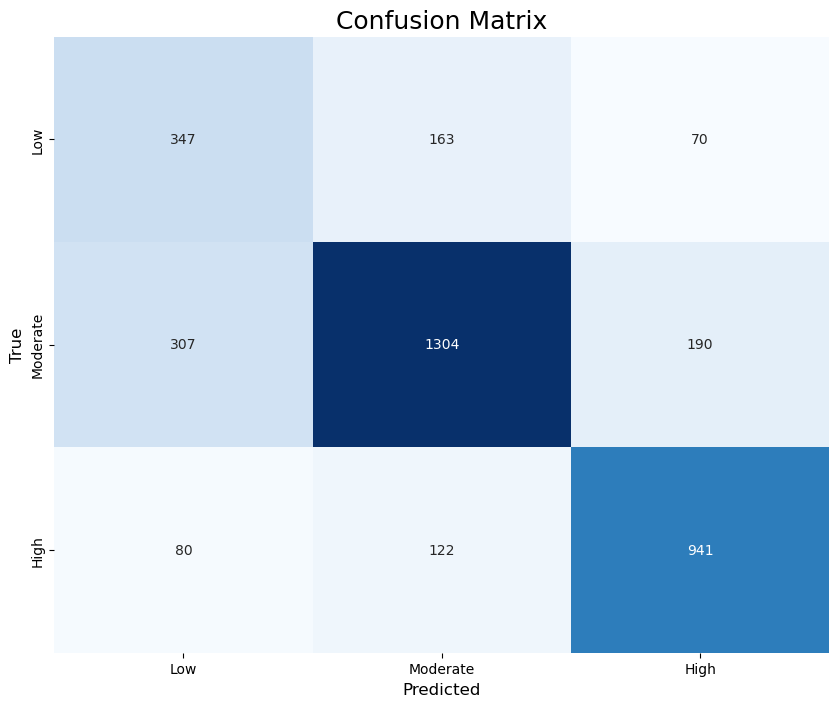

In [16]:
df_pal=create_success_column(df,'pal_sales')
X_train, X_test, y_train, y_test=split_to_train_and_test(df_pal,'success')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
clf_model=train_model(X_train_scaled,y_train,'DecisionTree')
pred_vals=predict(clf_model,X_test_scaled)
evaluate_model(y_test,pred_vals)

In the Pal model, it can be seen that the low success level correctly classified itself 347 times, misclassified 163 times as a moderate level and 70 times as a high level. The moderate success level correctly classified itself 1304 times, misclassified 307 times as a low level and 190 times as a high level.<br> The high success level correctly classified itself 941 times, misclassified 122 times as a medium level and 80 times as a low level.

Accuracy: 0.7724177071509648
F1 Score: 0.736300450272391
Recall Score: 0.7486973508955596
Precision Score: 0.7280994192960529


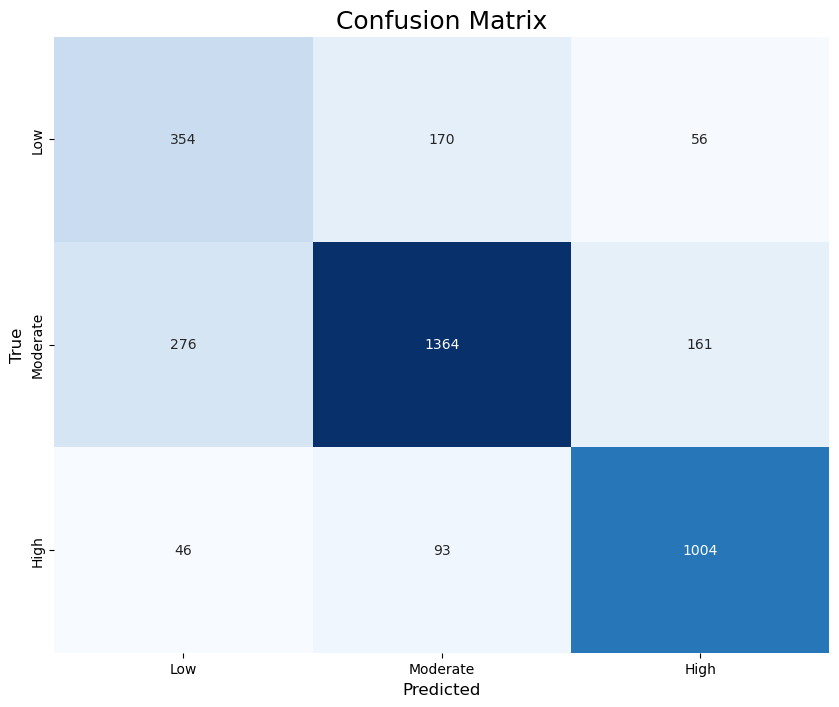

In [17]:
clf_model=train_model(X_train_scaled,y_train,'RandomForest')
pred_vals=predict(clf_model,X_test_scaled)
evaluate_model(y_test,pred_vals)

<b>North America Success Model</b>

Accuracy: 0.7908626560726447
F1 Score: 0.7923547288803056
Recall Score: 0.8050766972999592
Precision Score: 0.7891840949642797


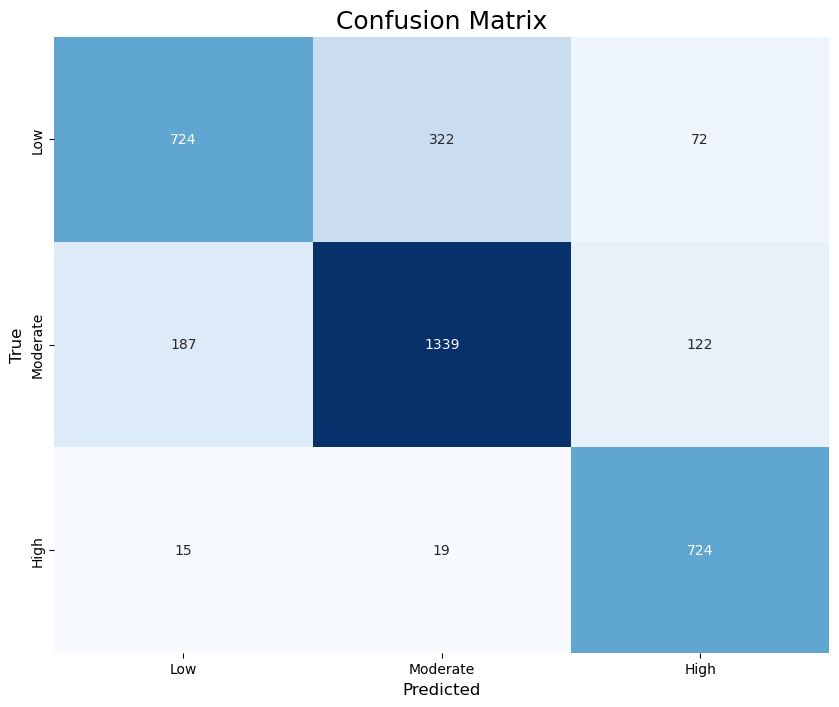

In [18]:
df_n_am=create_success_column(df,'n_america_sales')
X_train, X_test, y_train, y_test=split_to_train_and_test(df_n_am,'success')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
clf_model=train_model(X_train_scaled,y_train,'RandomForest')
pred_vals=predict(clf_model,X_test_scaled)
evaluate_model(y_test,pred_vals)

<b>Japan Success Model</b>

Accuracy: 0.593927355278093
F1 Score: 0.5139067468609418
Recall Score: 0.5160362952361366
Precision Score: 0.5127238429580091


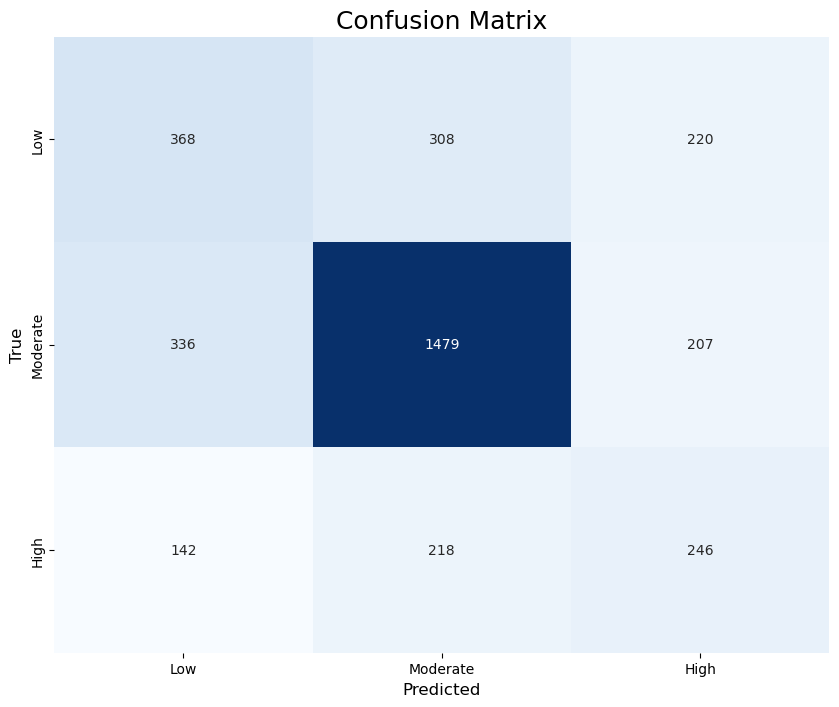

In [19]:
df_japan=create_success_column(df,'japan_sales')
X_train, X_test, y_train, y_test=split_to_train_and_test(df_japan,'success')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
clf_model=train_model(X_train_scaled,y_train,'DecisionTree')
pred_vals=predict(clf_model,X_test_scaled)
evaluate_model(y_test,pred_vals)

<b>Other Success Model</b>

Accuracy: 0.8481838819523269
F1 Score: 0.8465620418188218
Recall Score: 0.8514138919493663
Precision Score: 0.8450734016105153


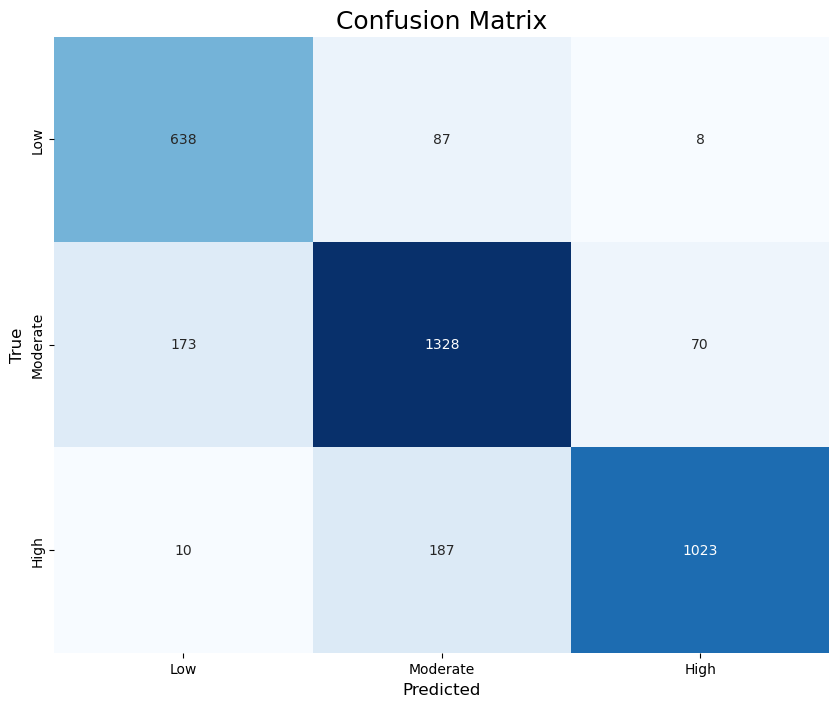

In [20]:
df_other=create_success_column(df,'other_sales')
X_train, X_test, y_train, y_test=split_to_train_and_test(df_other,'success')
X_train_scaled, X_test_scaled=scale_features(X_train,X_test)
clf_model=train_model(X_train_scaled,y_train,'RandomForest')
pred_vals=predict(clf_model,X_test_scaled)
evaluate_model(y_test,pred_vals)

### Summary
By using linear regression, the model of Pal and the other regions produced relatively good results in predicting game sales.<br> The model of North America had less success and the model of Japan did not succeed at all.<br>When we used random forest and decision tree for classification we obtained overall good results, the other regions model performed the best while Japan got the lowest results but still provided insights.<br>It is estimated that the failure of the Japan model could be attributed to several factors, one possible reason is that the market trend in Japan exhibits different patterns compared to other markets plus data verification and the lack of sufficient data might have posed challenges for the model to learn effectively from other markets when predicting Japan's performance. It is important to note that these conclusions are speculative and further research is needed to gain a deeper understanding of the reasons behind the lower learning performance of the Japanese models.<br>
To summarize, it is indeed feasible to utilize the historical context of games as a tool for anticipating future advancements. However, the trend itself of sales in different regions can completely change over the distant years and for example a year like 1977 cannot be predicted because there are no previous years before it so it is important to take that into account as well.